# $X_{hh}$ limits

**Goal:** We *really* wanted some limits with $X_{hh}$ to start to understand if we could get meaningful SM gains with reasonable wait times.

In [14]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf
import os

# Let's do ATLAS style plots too!
import matplotlib as mpl
os.sys.path.append( "../PyATLASstyle/")
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

os.sys.path.append('../stats-results/')
from var_bins_studies import get_bin_edgs

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [15]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

In [16]:
r = (275,1050)

In [17]:
corrOpts = [f'2_deta{i}_2_Xhh{j}' for i in ['','_corr'] for j in ['','_corr']]

bcats = ['4b','3b + 1 loose','4b and 3b + 1 loose']
idx = pd.Index([.05,.06,.07,.08,.09,.1],name='m_hh res')
cols = pd.MultiIndex.from_product([corrOpts,bcats])

time_df = pd.DataFrame(0,idx,cols)
lim_df = pd.DataFrame(0,idx,cols)

In [18]:
def getTime(test_file):
    
    mins, fCalls, mu = 0, 0,0
    with open(test_file, "r") as f:

        for l in f:
            
            if len(l.split(',')) == 6 and l[0] =='[' and l[-2]==']':
                mu = float(l.split(',')[3])
            
            if 'Finished in' in l:

                m = float(l.split(' ')[2])
                s = float(l.split(' ')[4])
                mins = m + s/60

            if 'function calls' in l:
                fCalls = l.split(' ')[0]
                break
            
    return mins, fCalls, mu

In [19]:
for bcat, blab in zip(bcats,['4b','3b1l','4b_3b1l']):
    for corr in corrOpts:
                
        for res in idx:

            edg = get_bin_edgs(r,res=res)
            label = f'{r[0]}_{r[1]}_res_' + f'{res}'.replace('.','p')
            label += corr

            log_file = f'../stats-results/log_files/xhh_{blab}_{label}.log'
                
            mins, fCalls,mu = getTime(log_file)
            
            time_df.loc[res,(corr,bcat)] = mins
            lim_df.loc[res,(corr,bcat)] = mu
    

Useful [stack overflow link](https://stackoverflow.com/questions/22566284/matplotlib-how-to-plot-images-instead-of-points) for including images on a figure.

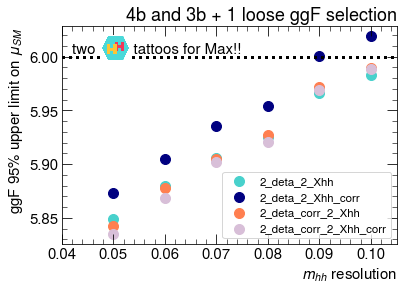

In [21]:
bcat = bcats[-1]
for corr, color in zip(corrOpts,['mediumturquoise','navy','coral','thistle']):
 
    y = lim_df[corr,bcat]
    plt.scatter(lim_df.index[y!=0],y[y!=0],color=color,
                marker='o',s=100,label=corr)

plt.xlabel('$m_{hh}$ resolution',loc='right')
plt.ylabel('ggF 95% upper limit on $\mu_{SM}$',loc='top')
plt.title(f'{bcat} ggF selection',loc='right')

xlim = (.04,.105)
plt.plot(xlim,[6]*2,ls='dotted',color='k')

ax = plt.gca()

arr_max = plt.imread('HHLogo.png')

imagebox = OffsetImage(arr_max, zoom=0.09)

ab = AnnotationBbox(imagebox, (.0503, 6.008), frameon=False)
ax.add_artist(ab)

plt.text(.042,6.0005,'two  HH  tattoos for Max!!',ha='left',va='bottom')
plt.xlim(xlim)

plt.legend(fontsize=11.5,loc='lower right',frameon=True)#fontsize=11.5,loc='upper left',bbox_to_anchor=(0,.85))

plt.show()

In [22]:
for res in idx:
    edg = get_bin_edgs(r,res=res)
    print(res,len(edg)-1)

0.05 28
0.06 23
0.07 20
0.08 18
0.09 16
0.1 15


In [23]:
lim_df

2_deta_2_Xhh                                  2_deta_2_Xhh_corr  \
                   4b 3b + 1 loose 4b and 3b + 1 loose                4b   
m_hh res                                                                   
0.05         6.138661    19.916027            5.848972          6.164449   
0.06         6.168702    20.055055            5.879649          6.195422   
0.07         6.197931    20.117538            5.905873          6.229423   
0.08         6.217523    20.184665            5.925343          6.249280   
0.09         6.261113    20.293117            5.965940          6.297867   
0.10         6.278922    20.315074            5.983279          6.317973   

                                          2_deta_corr_2_Xhh               \
         3b + 1 loose 4b and 3b + 1 loose                4b 3b + 1 loose   
m_hh res                                                                   
0.05        20.075784            5.873151          6.146628    19.265261   
0.06        20.216988            5.905044          6.180881    19.393729   
0.07        20.294913            5.935790          6.212195    19.440993   
0.08        20.358864            5.954212          6.234871    19.515701   
0.09        20.470310            6.000402          6.282496    19.613696   
0.10        20.495928            6.018872          6.302514    19.647467   

                             2_deta_corr_2_Xhh_corr               \
         4b and 3b + 1 loose                     4b 3b + 1 loose   
m_hh res                                                           
0.05                5.842460               6.137771    19.295326   
0.06                5.877885               6.170040    19.422549   
0.07                5.904566               6.208109    19.474109   
0.08                5.926967               6.228461    19.551191   
0.09                5.971814               6.279319    19.645262   
0.10                5.989858               6.301521    19.685000   

                              
         4b and 3b + 1 loose  
m_hh res                      
0.05                5.835035  
0.06                5.868245  
0.07                5.901600  
0.08                5.920329  
0.09                5.969145  
0.10                5.988494

In [24]:
(time_df / 60).round(1) 

2_deta_2_Xhh                                  2_deta_2_Xhh_corr  \
                   4b 3b + 1 loose 4b and 3b + 1 loose                4b   
m_hh res                                                                   
0.05              0.4          0.5                17.2               0.3   
0.06              0.3          0.3                 9.8               0.2   
0.07              0.2          0.2                 7.0               0.1   
0.08              0.2          0.1                 5.8               0.1   
0.09              0.1          0.2                 4.1               0.1   
0.10              0.1          0.1                 3.8               0.1   

                                          2_deta_corr_2_Xhh               \
         3b + 1 loose 4b and 3b + 1 loose                4b 3b + 1 loose   
m_hh res                                                                   
0.05              0.4                16.1               0.3          0.4   
0.06              0.2                 9.5               0.2          0.2   
0.07              0.2                 6.7               0.1          0.2   
0.08              0.1                 5.0               0.1          0.1   
0.09              0.1                 3.7               0.1          0.1   
0.10              0.1                 3.2               0.1          0.1   

                             2_deta_corr_2_Xhh_corr               \
         4b and 3b + 1 loose                     4b 3b + 1 loose   
m_hh res                                                           
0.05                    15.3                    0.2          0.3   
0.06                     9.2                    0.1          0.2   
0.07                     6.4                    0.1          0.1   
0.08                     4.9                    0.1          0.2   
0.09                     3.7                    0.1          0.1   
0.10                     3.3                    0.0          0.1   

                              
         4b and 3b + 1 loose  
m_hh res                      
0.05                    14.2  
0.06                     8.6  
0.07                     6.0  
0.08                     4.6  
0.09                     3.4  
0.10                     2.5

In [25]:
corrOpts

['2_deta_2_Xhh',
 '2_deta_2_Xhh_corr',
 '2_deta_corr_2_Xhh',
 '2_deta_corr_2_Xhh_corr']

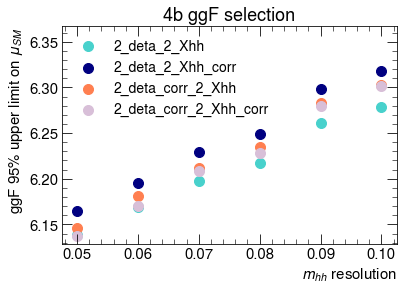

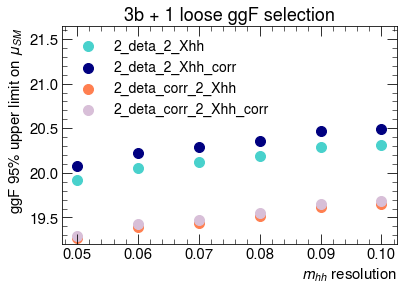

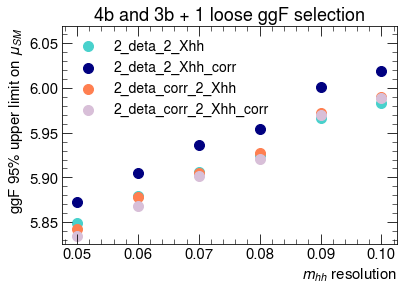

In [32]:
for bcat, blab in zip(bcats,['4b','3b1l','4b_3b1l']):
    plt.figure()
    for corr, color in zip(corrOpts,['mediumturquoise','navy','coral','thistle']):
 
        y = lim_df[corr,bcat]
        plt.scatter(lim_df.index[y!=0],y[y!=0],color=color,
                    marker='o',s=100,label=corr)
    
    plt.xlabel('$m_{hh}$ resolution',loc='right')
    plt.ylabel('ggF 95% upper limit on $\mu_{SM}$',loc='top')
    plt.legend(loc='upper left')
    plt.title(f'{bcat} ggF selection')
    
    ymin,ymax = plt.ylim()
    if blab=='3b1l':
        plt.ylim(ymin,ymax + .8*(ymax-ymin))
    else:
        plt.ylim(ymin,ymax + .2*(ymax-ymin))
        
        
    plt.savefig(f'figures/Xhh_cats/mu_vs_res_{blab}.pdf',bbox_inches='tight')

OK - I think smth is wonky w/ these limits rn - b/c what I understand from my sub script, these 2_deta jobs are actually 3 deta_hh cats, so it wouldn't make sense for these to get *worse* I think?

In [54]:
with open('../stats-results/var_bins/ws-4b-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-275_1050_res_0p1_2_deta_2_Xhh_corr.json') as f:
    ws = json.load(f)

In [55]:
ws

{'channels': [{'name': 'channel16cat_4b_0_Xhh-0.0-0.95',
   'samples': [{'name': 'signal16cat_4b_0_Xhh-0.0-0.95',
     'data': [0.00066761486,
      0.016566884,
      0.08750278,
      0.17727739,
      0.2374357,
      0.24584144,
      0.21264929,
      0.19980937,
      0.14991248,
      0.11138177,
      0.07106972,
      0.0568763,
      0.02688253,
      0.016147971,
      0.012119174],
     'modifiers': [{'name': 'mu', 'type': 'normfactor', 'data': None}]},
    {'name': 'background16cat_4b_0_Xhh-0.0-0.95',
     'data': [10.196773412594359,
      46.63864479714141,
      80.73720097887136,
      73.43369622689649,
      58.242664230856164,
      36.342272073476636,
      24.823844786840027,
      16.543305262474547,
      10.278251519864284,
      8.344844201886986,
      4.301390053271518,
      3.0608151465478954,
      1.5739112272299849,
      0.7225731914427911,
      0.3922195392394201],
     'modifiers': [{'name': 'uncorr_bkguncrt16cat_4b_0_Xhh-0.0-0.95',
       'type': '

Ok - it *does* look like 3 $\Delta \eta_{hh}$ bins - so I guess the only proposal for smth different happening is that the more systs are v much changing this result?

In [14]:
res = 0.1
res_str = f'{r[0]}_{r[1]}_res_'+f'{res}'.replace('.','p')
ws_name = f'../stats-results/var_bins/ws-4b-systs-HTcut-300.0-dEta_hh-cat-16-17-18-SM-HH-{res_str}.json'

with open(ws_name) as f:
    ws0 = json.load(f)

In [15]:
vals = np.vstack([obs['data'] for obs in ws['observations']]).T
xcols = [obs['name'][7:] for obs in ws['observations']]

xhh_df = pd.DataFrame(vals,columns=xcols)

In [16]:
vals = np.vstack([obs['data'] for obs in ws0['observations']]).T
ecols = [obs['name'][7:] for obs in ws0['observations']]

deta_df = pd.DataFrame(vals,columns=ecols)

In [42]:
deta_df

16cat_4b_0  16cat_4b_1  16cat_4b_2  17cat_4b_0  17cat_4b_1  17cat_4b_2  \
0    31.778672   21.578063   12.635168   48.678668   21.530664   11.145433   
1   133.749444   97.650867   51.256166  145.823137  110.264058   62.719666   
2   224.687200  191.195909  121.259373  274.460703  237.185122  144.679389   
3   218.972637  221.033139  176.146721  279.674505  282.739170  221.210715   
4   167.884739  171.504066  178.353200  221.801644  238.645066  237.776457   
5   109.903873  125.723131  151.712900  144.275839  171.060857  201.697588   
6    70.327743   86.274815  107.679491  109.107328  122.942052  155.550472   
7    46.256927   52.632605   71.802207   82.880536   89.930553  106.641070   
8    28.570422   33.717683   47.519264   61.075926   68.391671   80.493707   
9    20.966747   24.453673   29.007688   43.899496   55.437891   62.329077   
10   13.418153   17.664816   19.864186   27.180431   35.585788   42.192714   
11    8.766529   10.176042   12.400517   15.367907   21.313927   29.467764   
12    5.257723    6.096604    9.349876    8.930189   12.964626   15.984772   
13    3.117516    3.622464    5.225738    3.622192    6.002459   10.213468   
14    0.932703    1.800864    4.812176    1.929468    3.006036    8.408833   

    18cat_4b_0  18cat_4b_1  18cat_4b_2  
0    67.414584   38.499935   31.172096  
1   275.527745  205.274989  110.583185  
2   493.229065  410.557180  258.582153  
3   510.552319  506.061995  399.345670  
4   380.516054  422.374356  410.882227  
5   265.429988  300.912595  344.077056  
6   168.350190  202.078408  250.902829  
7   112.349863  126.143727  162.816554  
8    80.752733   94.323974  107.648179  
9    59.599808   69.335685   76.538096  
10   36.804459   42.536656   53.611166  
11   21.424459   28.518553   41.245290  
12   13.772647   15.994285   21.559129  
13    6.536171    8.051581   13.670471  
14    3.819699    4.906954   14.595003

In [44]:
xhh_df[xcols[0]]+xhh_df[xcols[1]]

0     11.274885
1     52.324108
2     90.036056
3     81.585206
4     66.413232
5     40.884825
6     28.454212
7     18.559434
8     11.590574
9      9.323105
10     4.887161
11     3.254954
12     1.756580
13     0.862516
14     0.406525
dtype: float64

In [34]:
xhh_df

16cat_4b_0_Xhh-0.0-0.95  16cat_4b_0_Xhh-0.95-1.0  16cat_4b_1_Xhh-0.0-0.95  \
0                 10.196773                 1.078112                 8.030466   
1                 46.638645                 5.685463                34.442475   
2                 80.737201                 9.298855                67.629657   
3                 73.433696                 8.151510                76.648200   
4                 58.242664                 8.170568                58.443427   
5                 36.342272                 4.542553                44.206572   
6                 24.823845                 3.630367                29.681531   
7                 16.543305                 2.016129                17.921731   
8                 10.278252                 1.312322                11.909282   
9                  8.344844                 0.978261                 8.875922   
10                 4.301390                 0.585771                 6.842091   
11                 3.060815                 0.194139                 3.534087   
12                 1.573911                 0.182668                 2.350638   
13                 0.722573                 0.139943                 1.031940   
14                 0.392220                 0.014305                 0.713748   

    16cat_4b_1_Xhh-0.95-1.0  16cat_4b_2_Xhh-0.0-0.95  16cat_4b_2_Xhh-0.95-1.0  \
0                  0.631062                 3.975189                 1.222536   
1                  3.927148                17.234048                 1.619834   
2                  8.516164                44.344729                 4.582092   
3                  8.506569                61.676996                 6.137382   
4                  6.759351                60.334431                 6.807139   
5                  4.729138                52.851032                 5.612571   
6                  3.609338                36.752067                 4.370477   
7                  2.714520                24.920745                 2.569358   
8                  1.329740                16.921305                 1.686341   
9                  1.177835                 9.796921                 0.947123   
10                 0.619114                 6.237555                 0.586250   
11                 0.245207                 4.256724                 0.298278   
12                 0.340477                 2.297183                 0.781277   
13                 0.065633                 1.608574                 0.124100   
14                 0.089717                 1.419176                 0.190088   

    17cat_4b_0_Xhh-0.0-0.95  17cat_4b_0_Xhh-0.95-1.0  17cat_4b_1_Xhh-0.0-0.95  \
0                 17.565622                 6.404692                 6.448579   
1                 58.292316                 4.741030                42.570132   
2                103.955726                11.778111                80.093711   
3                 91.062354                11.365070                99.391988   
4                 83.546776                 8.152143                84.571803   
5                 50.732076                 6.049143                58.383416   
6                 36.286099                 4.471104                39.816031   
7                 29.677848                 3.063671                30.744000   
8                 20.489063                 2.679396                22.905868   
9                 14.775729                 1.687731                17.387278   
10                 9.460933                 0.917776                13.052613   
11                 5.753894                 0.608521                 7.935493   
12                 3.338321                 0.192000                 5.679362   
13                 1.341991                 0.162593                 1.677411   
14                 0.644666                 0.042759                 1.114856   

    17cat_4b_1_Xhh-0.95-1.0  17cat_4b_2_Xhh-0.0-0.95  17cat_4b_2_Xhh-0.95-1.0  \
0                  0.826323     

In [27]:
len(ws['observations'])

18

In [28]:
ws['observations'][0]

{'name': 'channel16cat_4b_0_Xhh-0.0-0.95',
 'data': [10.196773412594359,
  46.63864479714141,
  80.73720097887136,
  73.43369622689649,
  58.242664230856164,
  36.342272073476636,
  24.823844786840027,
  16.543305262474547,
  10.278251519864284,
  8.344844201886986,
  4.301390053271518,
  3.0608151465478954,
  1.5739112272299849,
  0.7225731914427911,
  0.3922195392394201]}